In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Set seed for reproducibility
np.random.seed(42)


In [25]:
# Number of samples (time points)
n_samples = 400

# Number of sensors
n_sensors = 4

# Generate normal operation data for each sensor
normal_data = np.random.normal(loc=0, scale=1, size=(n_samples, n_sensors))

# Introduce anomalies randomly
anomaly_indices = np.random.choice(n_samples, size=20, replace=False)
normal_data[anomaly_indices, 0] += 5  # introduce anomalies in Sensor_1
normal_data[anomaly_indices, 1] -= 5  # introduce anomalies in Sensor_2

# Create a DataFrame
columns = [f'Sensor_{i}' for i in range(1, n_sensors + 1)]
df = pd.DataFrame(normal_data, columns=columns)

# Add labels for normal and anomaly
df['Label'] = 'Normal'
df.loc[anomaly_indices, 'Label'] = 'Anomaly'


In [26]:
pip install numpy pandas matplotlib scikit-learn seaborn


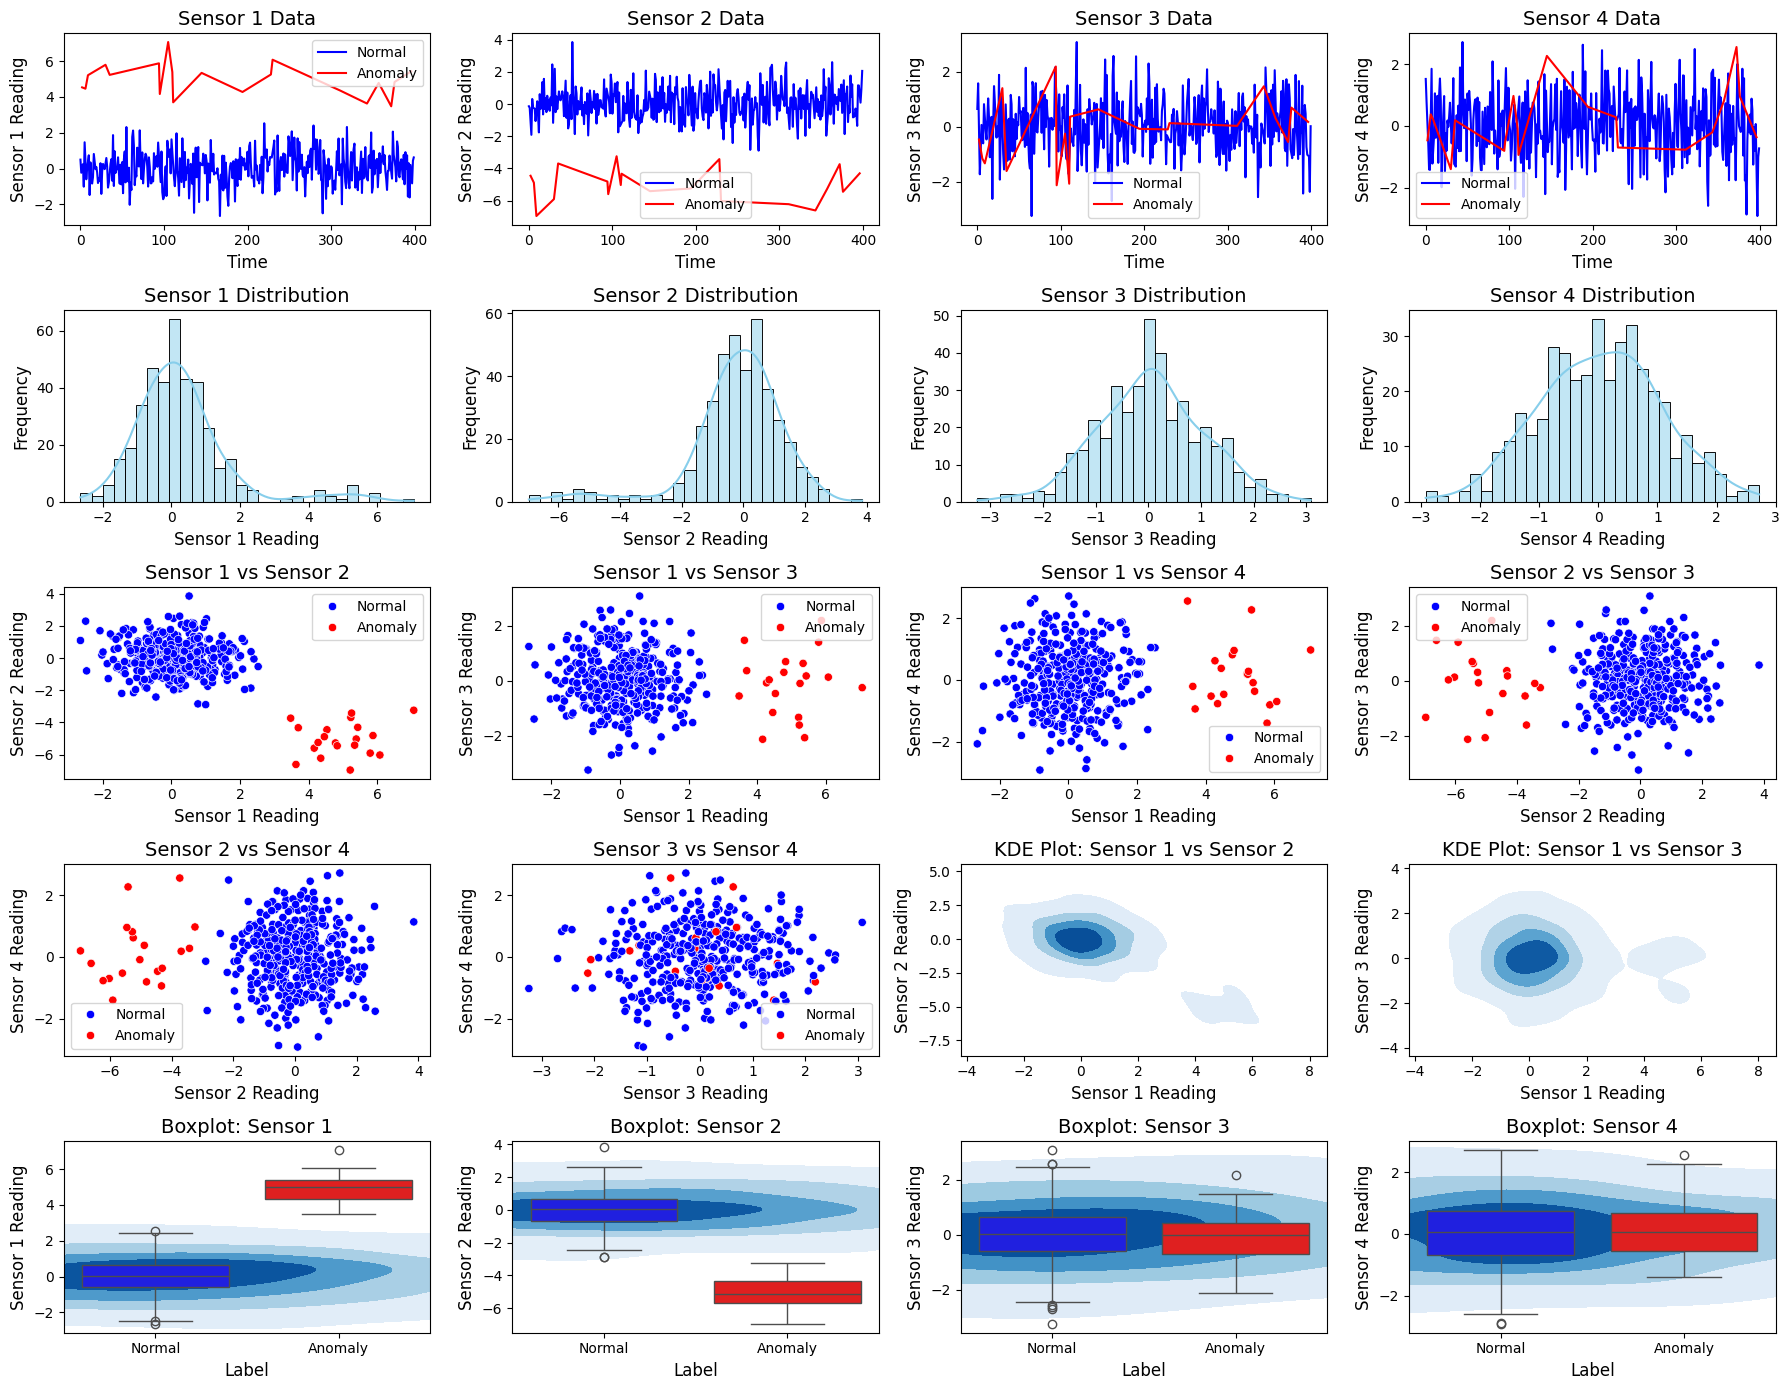

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))

# Line plots for each sensor's data
for i in range(n_sensors):
    plt.subplot(5, 4, i + 1)
    sns.lineplot(x=df.index, y=df[f'Sensor_{i+1}'], hue=df['Label'], palette=['blue', 'red'])
    plt.title(f'Sensor {i+1} Data', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(f'Sensor {i+1} Reading', fontsize=12)
    plt.legend(fontsize=10)

# Histograms and KDE plots for each sensor
for i in range(n_sensors):
    plt.subplot(5, 4, i + 5)
    sns.histplot(df[f'Sensor_{i+1}'], bins=30, kde=True, color='skyblue')
    plt.title(f'Sensor {i+1} Distribution', fontsize=14)
    plt.xlabel(f'Sensor {i+1} Reading', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Scatter plots between pairs of sensors
sensor_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for i, (s1, s2) in enumerate(sensor_pairs):
    plt.subplot(5, 4, i + 9)
    sns.scatterplot(x=df[f'Sensor_{s1+1}'], y=df[f'Sensor_{s2+1}'], hue=df['Label'], palette=['blue', 'red'])
    plt.title(f'Sensor {s1+1} vs Sensor {s2+1}', fontsize=14)
    plt.xlabel(f'Sensor {s1+1} Reading', fontsize=12)
    plt.ylabel(f'Sensor {s2+1} Reading', fontsize=12)
    plt.legend(fontsize=10)

# KDE plots for each sensor pair
for i, (s1, s2) in enumerate(sensor_pairs):
    plt.subplot(5, 4, i + 15)
    sns.kdeplot(x=df[f'Sensor_{s1+1}'], y=df[f'Sensor_{s2+1}'], fill=True, cmap='Blues', levels=5)
    plt.title(f'KDE Plot: Sensor {s1+1} vs Sensor {s2+1}', fontsize=14)
    plt.xlabel(f'Sensor {s1+1} Reading', fontsize=12)
    plt.ylabel(f'Sensor {s2+1} Reading', fontsize=12)

# Boxplot for each sensor
for i in range(n_sensors):
    plt.subplot(5, 4, i + 17)  # Adjusted to fit within the 5x4 grid
    sns.boxplot(x='Label', y=f'Sensor_{i+1}', data=df, palette=['blue', 'red'], hue='Label', legend=False)
    plt.title(f'Boxplot: Sensor {i+1}', fontsize=14)
    plt.xlabel('Label', fontsize=12)
    plt.ylabel(f'Sensor {i+1} Reading', fontsize=12)

plt.tight_layout()
plt.show()


In [28]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the 'Label' column

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])


In [29]:
# Create the model
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
model.fit(df_scaled)

# Predict anomalies
df['Anomaly'] = model.predict(df_scaled)
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})


Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.85      0.85      0.85        20
      Normal       0.99      0.99      0.99       380

    accuracy                           0.98       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.98      0.98      0.98       400



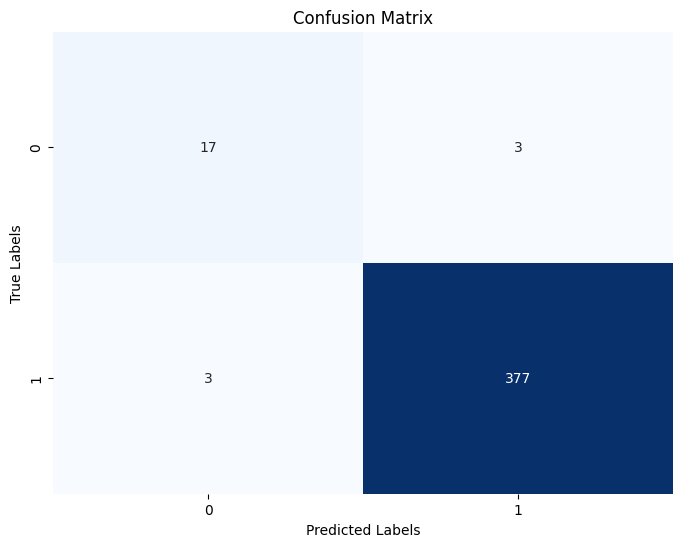

In [30]:
print("Classification Report:")
print(classification_report(df['Label'], df['Anomaly']))

# Confusion matrix
cm = confusion_matrix(df['Label'], df['Anomaly'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

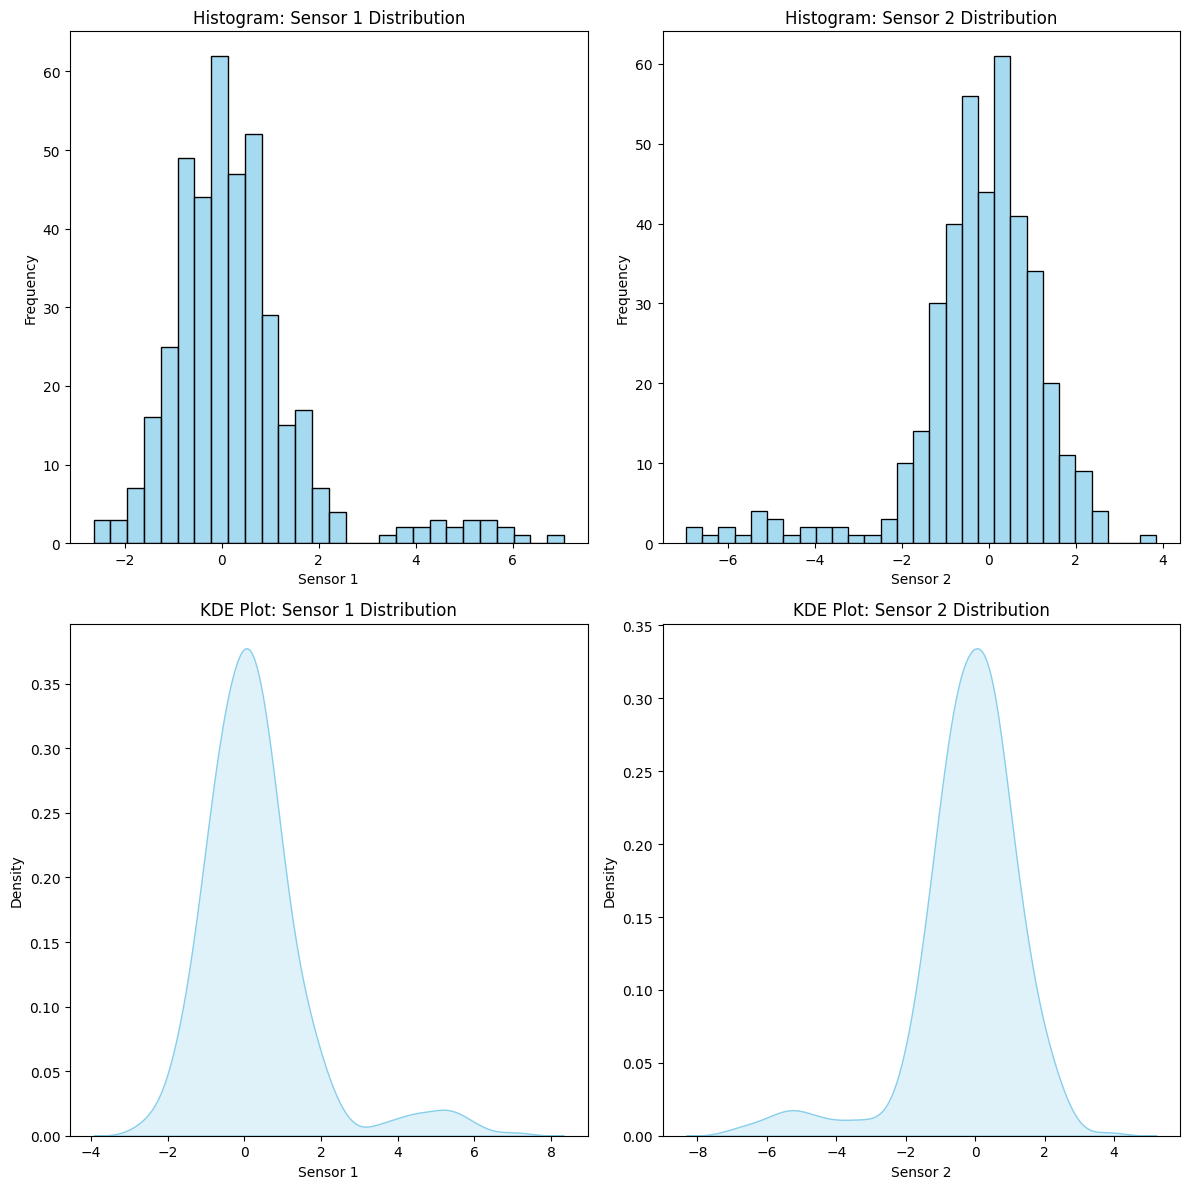

In [31]:


# Assuming df is the DataFrame containing your data
plt.figure(figsize=(12, 12))

# Loop through the sensors and create subplots
for i in range(4):
    plt.subplot(2, 2, i + 1)

    # Histogram
    if i < 2:
        sns.histplot(df[f'Sensor_{i+1}'], kde=False, color='skyblue')
        plt.title(f'Histogram: Sensor {i+1} Distribution')
        plt.xlabel(f'Sensor {i+1}')
        plt.ylabel('Frequency')

    # KDE Plot
    else:
        sns.kdeplot(df[f'Sensor_{i-1}'], fill=True, color='skyblue')
        plt.title(f'KDE Plot: Sensor {i-1} Distribution')
        plt.xlabel(f'Sensor {i-1}')
        plt.ylabel('Density')

plt.tight_layout()
plt.show()



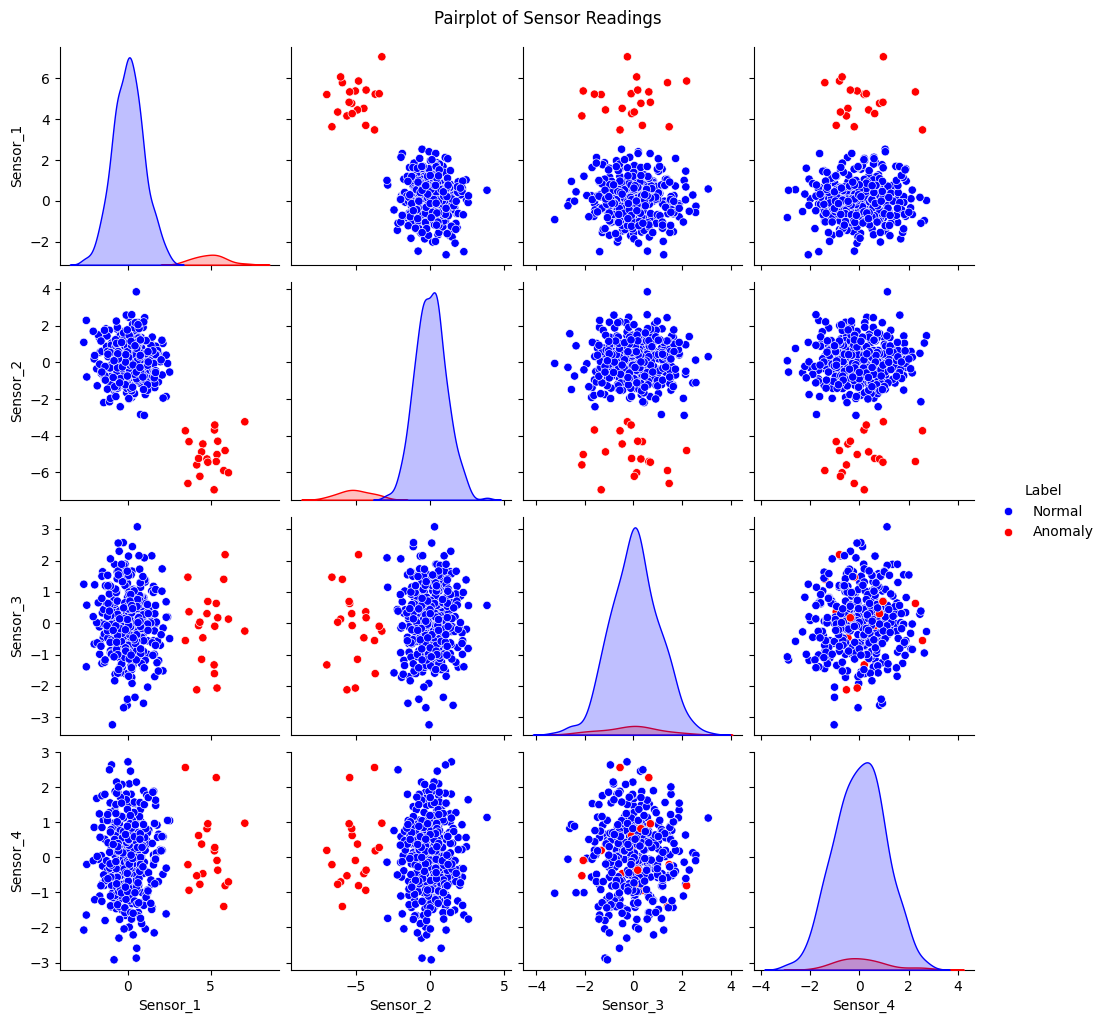

In [32]:
# Scatter plot matrix between pairs of sensors
sns.pairplot(df, vars=[f'Sensor_{i}' for i in range(1, n_sensors + 1)], hue='Label', palette=['blue', 'red'])
plt.suptitle('Pairplot of Sensor Readings', y=1.02)
plt.show()


<ipython-input-33-639bcf21964e>:17: UserWarning:


The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning:

You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



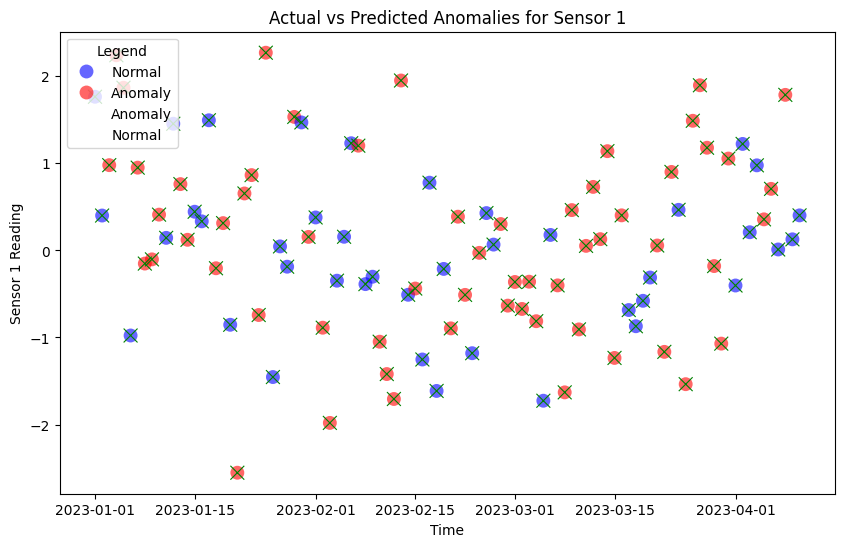

In [33]:

np.random.seed(0)
time_index = pd.date_range('2023-01-01', periods=100, freq='D')
sensor_readings = np.random.normal(loc=0, scale=1, size=100)
labels = np.random.choice(['Normal', 'Anomaly'], size=100)
predicted_labels = np.random.choice(['Normal', 'Anomaly'], size=100)

df = pd.DataFrame({'Time': time_index, 'Sensor_1': sensor_readings, 'Label': labels, 'Predicted_Label': predicted_labels})
df = df.set_index('Time')

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual labels
sns.scatterplot(x=df.index, y='Sensor_1', hue='Label', data=df, palette=['blue', 'red'], alpha=0.6, s=100, edgecolor='none', legend='full')

# Plot predicted anomalies
sns.scatterplot(x=df.index, y='Sensor_1', hue='Predicted_Label', data=df, palette=['green'], marker='x', s=100, edgecolor='none')

plt.title('Actual vs Predicted Anomalies for Sensor 1')
plt.xlabel('Time')
plt.ylabel('Sensor 1 Reading')
plt.legend(title='Legend', loc='upper left')

plt.show()



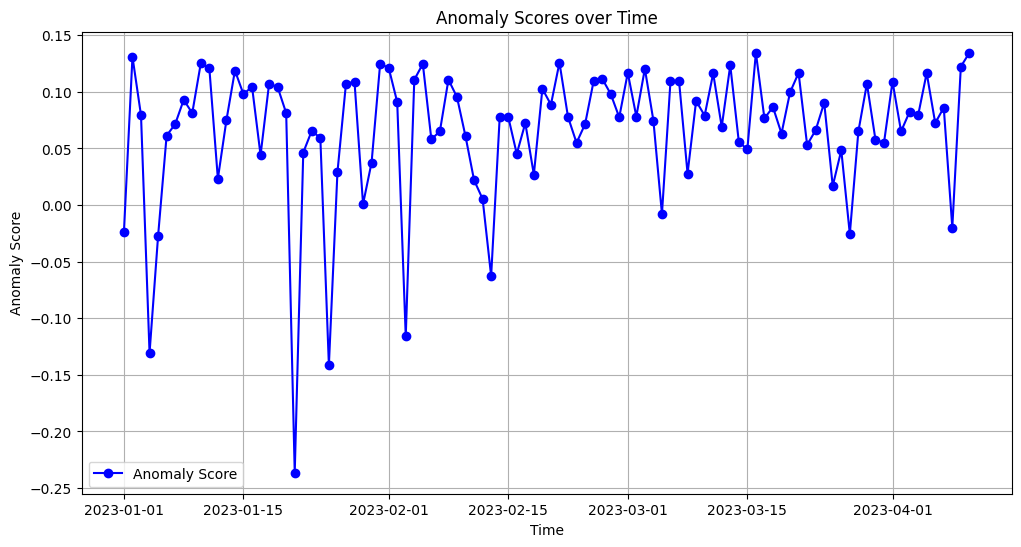

In [34]:


# Example DataFrame (replace this with your actual data)
np.random.seed(0)
time_index = pd.date_range('2023-01-01', periods=100, freq='D')
sensor_readings = np.random.normal(loc=0, scale=1, size=100)
labels = np.random.choice([0, 1], size=100)

df = pd.DataFrame({'Time': time_index, 'Sensor_1': sensor_readings, 'Label': labels})
df = df.set_index('Time')

# Example of scaling your data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Sensor_1']])

# Example of model prediction (Isolation Forest)
model = IsolationForest(contamination=0.1, random_state=0)
model.fit(df_scaled)
df['AnomalyScore'] = model.decision_function(df_scaled)

# Plot anomaly scores over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AnomalyScore'], marker='o', linestyle='-', color='b', label='Anomaly Score')
plt.title('Anomaly Scores over Time')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid(True)
plt.show()



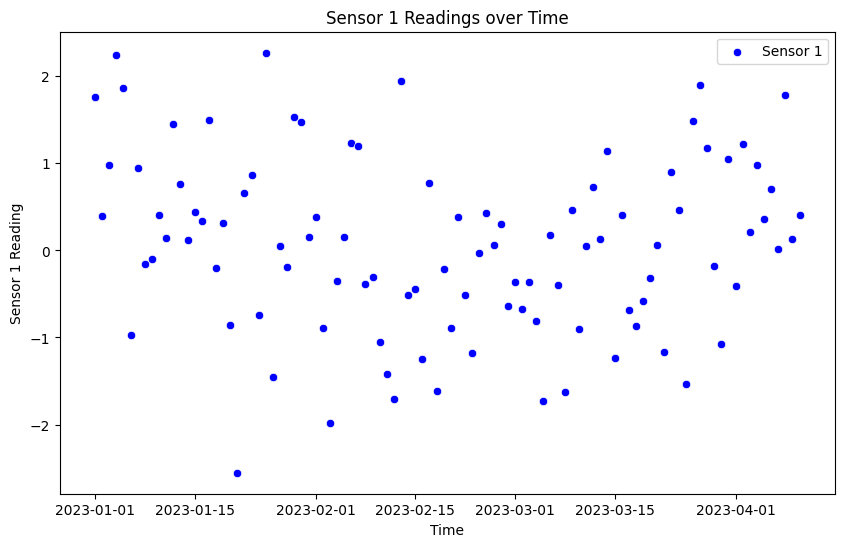

In [35]:

np.random.seed(0)
time_index = pd.date_range('2023-01-01', periods=100, freq='D')
sensor_1_readings = np.random.normal(loc=0, scale=1, size=100)
sensor_2_readings = np.random.normal(loc=0, scale=1, size=100)

df = pd.DataFrame({'Time': time_index, 'Sensor_1': sensor_1_readings, 'Sensor_2': sensor_2_readings})
df = df.set_index('Time')

# Plotting Sensor 1 readings against time
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df.index, y='Sensor_1', data=df, color='blue', label='Sensor 1')

plt.title('Sensor 1 Readings over Time')
plt.xlabel('Time')
plt.ylabel('Sensor 1 Reading')
plt.legend()

plt.show()


<ipython-input-36-4940a295bd84>:10: UserWarning:



`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-36-4940a295bd84>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




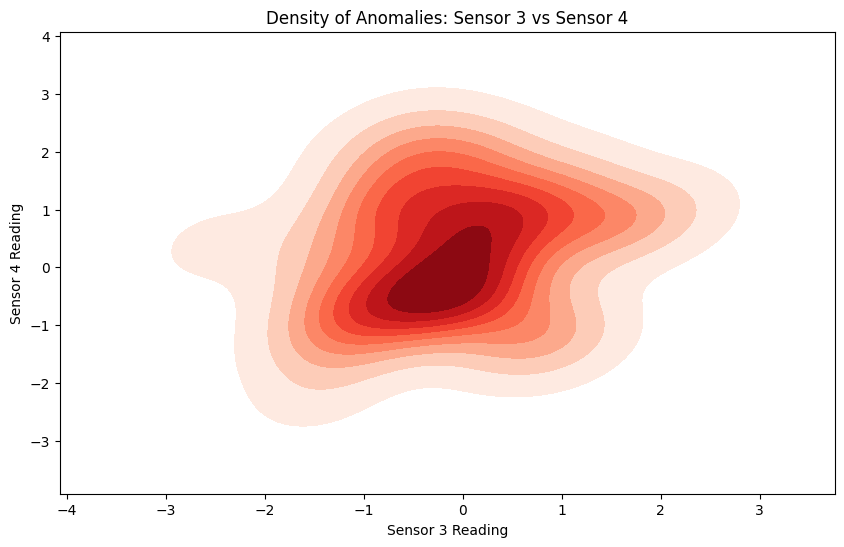

In [36]:
np.random.seed(0)
sensor_3_readings = np.random.normal(loc=0, scale=1, size=100)
sensor_4_readings = np.random.normal(loc=0, scale=1, size=100)
anomaly_labels = np.random.choice(['Normal', 'Anomaly'], size=100)

df = pd.DataFrame({'Sensor_3': sensor_3_readings, 'Sensor_4': sensor_4_readings, 'Anomaly': anomaly_labels})

# KDE plot to visualize density of anomalies
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Sensor_3', y='Sensor_4', data=df[df['Anomaly'] == 'Anomaly'], cmap='Reds', shade=True, shade_lowest=False)
plt.title('Density of Anomalies: Sensor 3 vs Sensor 4')
plt.xlabel('Sensor 3 Reading')
plt.ylabel('Sensor 4 Reading')
plt.show()



In [37]:
import plotly.express as px
import pandas as pd

np.random.seed(0)
time_index = pd.date_range('2023-01-01', periods=100, freq='D')
sensor_1_readings = np.random.normal(loc=0, scale=1, size=100)
labels = np.random.choice(['Normal', 'Anomaly'], size=100)

df = pd.DataFrame({'Time': time_index, 'Sensor_1': sensor_1_readings, 'Label': labels})
df = df.set_index('Time')

# Create an interactive time series plot
fig = px.line(df, x=df.index, y='Sensor_1', color='Label',
              title='Interactive Time Series Plot: Sensor 1',
              labels={'x': 'Time', 'y': 'Sensor 1 Reading', 'color': 'Label'},
              line_shape='linear', render_mode='svg')

fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Assume df contains the synthetic dataset with sensors and labels

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the 'Label' column

# Create the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict anomalies
df['AnomalyScore'] = model.fit_predict(df_scaled)
df['AnomalyScore'] = model.decision_function(df_scaled)  # Anomaly scores

# Map the predictions to 'Anomaly' or 'Normal'
df['Anomaly'] = np.where(df['AnomalyScore'] < 0, 'Anomaly', 'Normal')




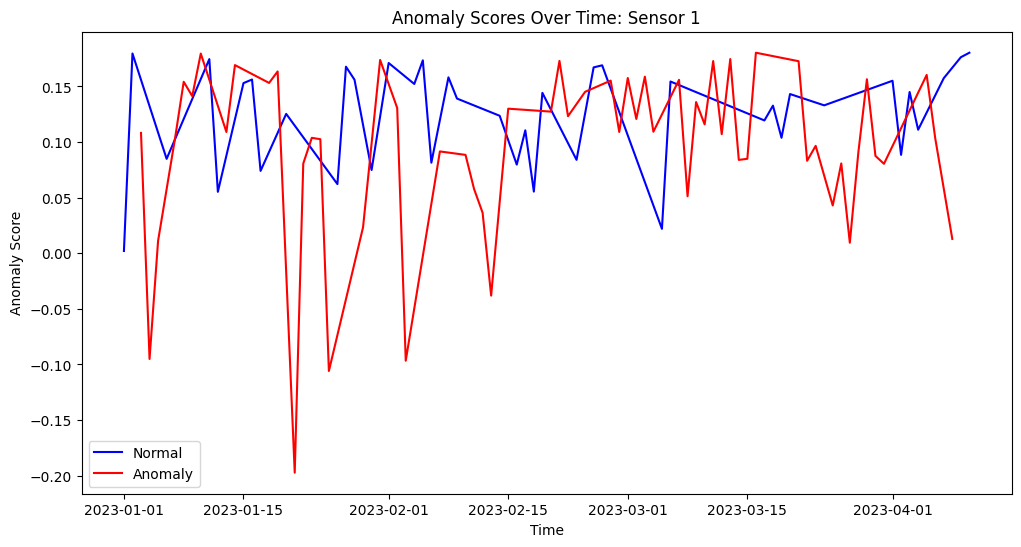

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['AnomalyScore'], hue=df['Label'], palette=['blue', 'red'])
plt.title('Anomaly Scores Over Time: Sensor 1')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()
plt.show()


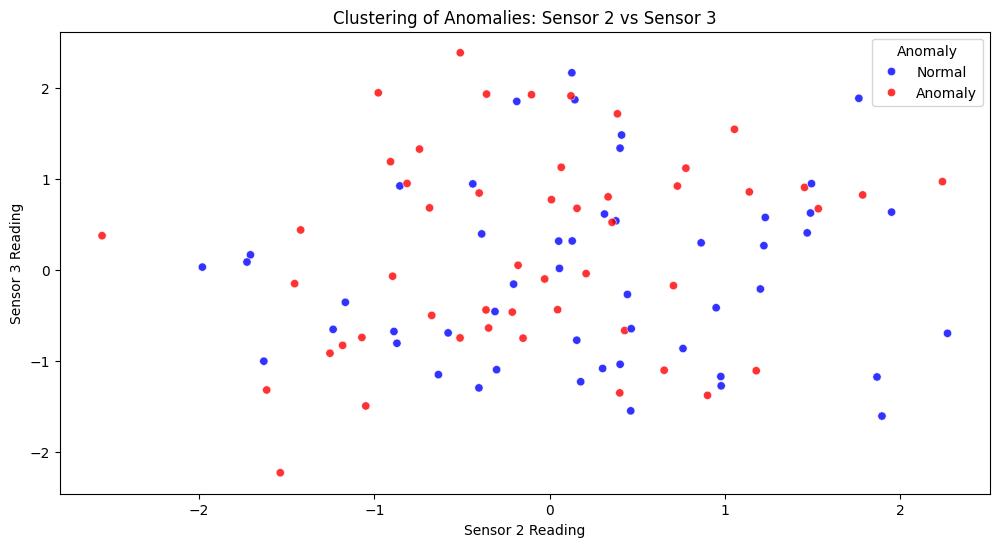

In [40]:
np.random.seed(0)
sensor_2_readings = np.random.normal(loc=0, scale=1, size=100)
sensor_3_readings = np.random.normal(loc=0, scale=1, size=100)
anomaly_labels = np.random.choice(['Normal', 'Anomaly'], size=100)

df = pd.DataFrame({'Sensor_2': sensor_2_readings, 'Sensor_3': sensor_3_readings, 'Anomaly': anomaly_labels})

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sensor_2', y='Sensor_3', hue='Anomaly', data=df, palette=['blue', 'red'], alpha=0.8)
plt.title('Clustering of Anomalies: Sensor 2 vs Sensor 3')
plt.xlabel('Sensor 2 Reading')
plt.ylabel('Sensor 3 Reading')
plt.show()


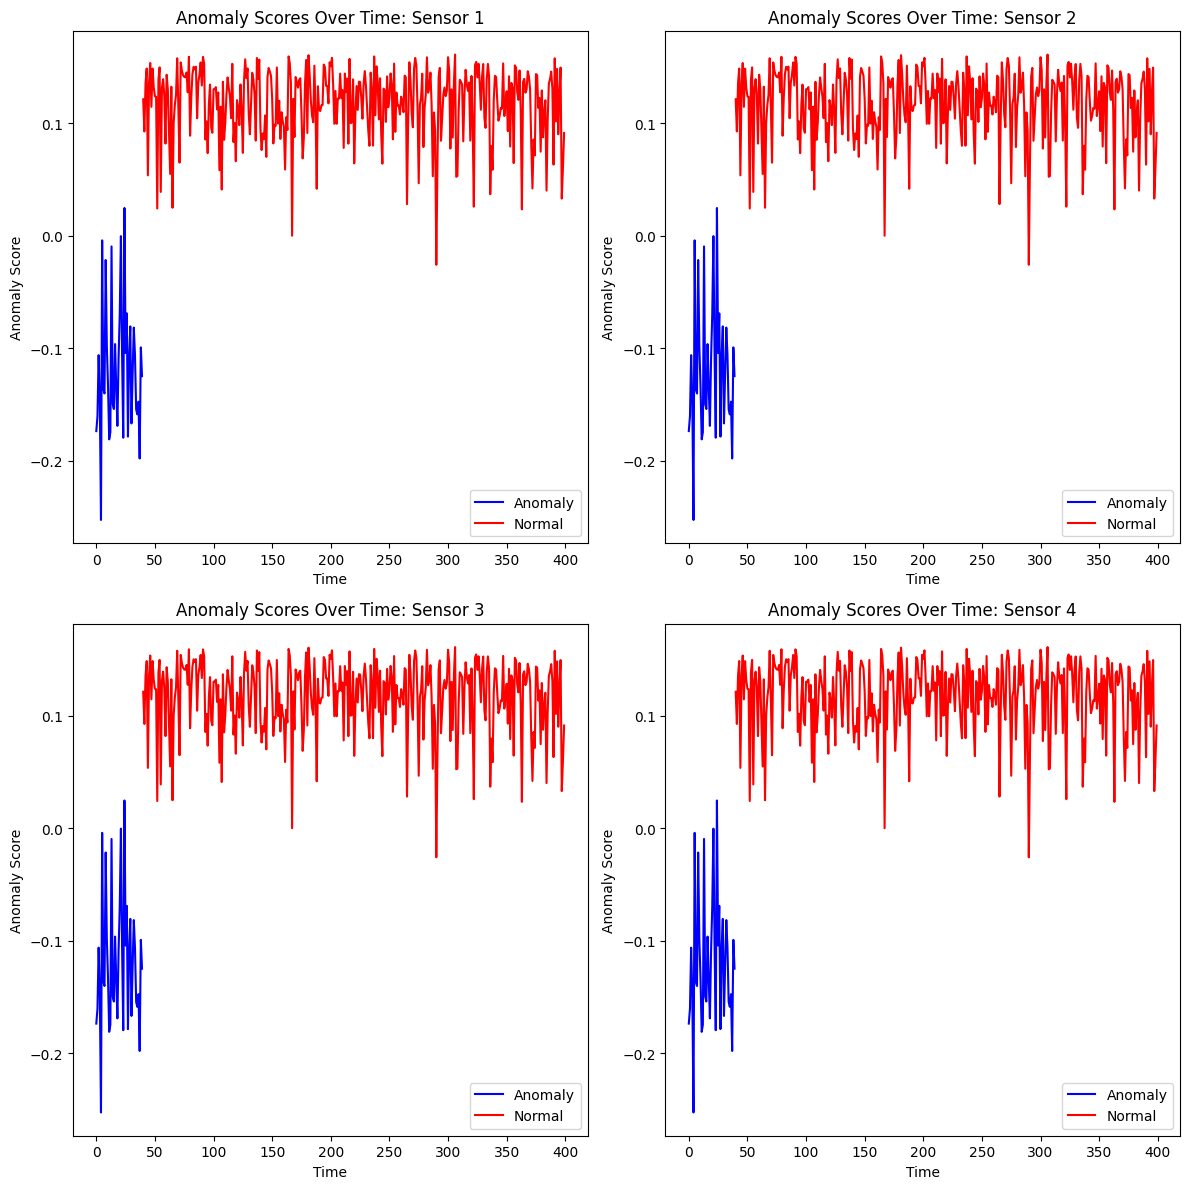

In [41]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset
np.random.seed(42)
n_samples = 400
n_features = 4

# Simulating sensor data
data = np.random.randn(n_samples, n_features)
df = pd.DataFrame(data, columns=[f'Sensor_{i+1}' for i in range(n_features)])

# Adding some anomalies
n_anomalies = 40
anomalies = np.random.uniform(low=-6, high=6, size=(n_anomalies, n_features))
df.loc[:n_anomalies-1] = anomalies

# Add labels
df['Label'] = ['Anomaly' if i < n_anomalies else 'Normal' for i in range(n_samples)]

# Isolation Forest to compute anomaly scores
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the 'Label' column

model = IsolationForest(contamination=0.1, random_state=42)
df['AnomalyScore'] = model.fit_predict(df_scaled)
df['AnomalyScore'] = model.decision_function(df_scaled)  # Anomaly scores

# Mapping predictions to 'Anomaly' or 'Normal'
df['Anomaly'] = np.where(df['AnomalyScore'] < 0, 'Anomaly', 'Normal')

# Plotting Anomaly Scores Over Time for Different Sensors
plt.figure(figsize=(12, 12))

# Sensor 1
plt.subplot(2, 2, 1)
sns.lineplot(x=df.index, y=df['AnomalyScore'], hue=df['Label'], palette=['blue', 'red'])
plt.title('Anomaly Scores Over Time: Sensor 1')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()

# Sensor 2
plt.subplot(2, 2, 2)
sns.lineplot(x=df.index, y=df['AnomalyScore'], hue=df['Label'], palette=['blue', 'red'])
plt.title('Anomaly Scores Over Time: Sensor 2')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()

# Sensor 3
plt.subplot(2, 2, 3)
sns.lineplot(x=df.index, y=df['AnomalyScore'], hue=df['Label'], palette=['blue', 'red'])
plt.title('Anomaly Scores Over Time: Sensor 3')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()

# Sensor 4
plt.subplot(2, 2, 4)
sns.lineplot(x=df.index, y=df['AnomalyScore'], hue=df['Label'], palette=['blue', 'red'])
plt.title('Anomaly Scores Over Time: Sensor 4')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()

plt.tight_layout()
plt.show()


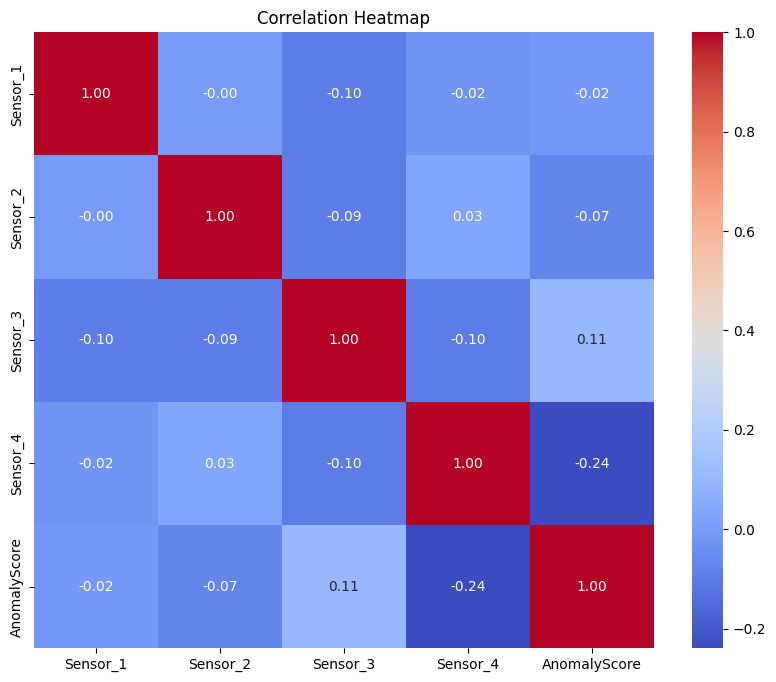

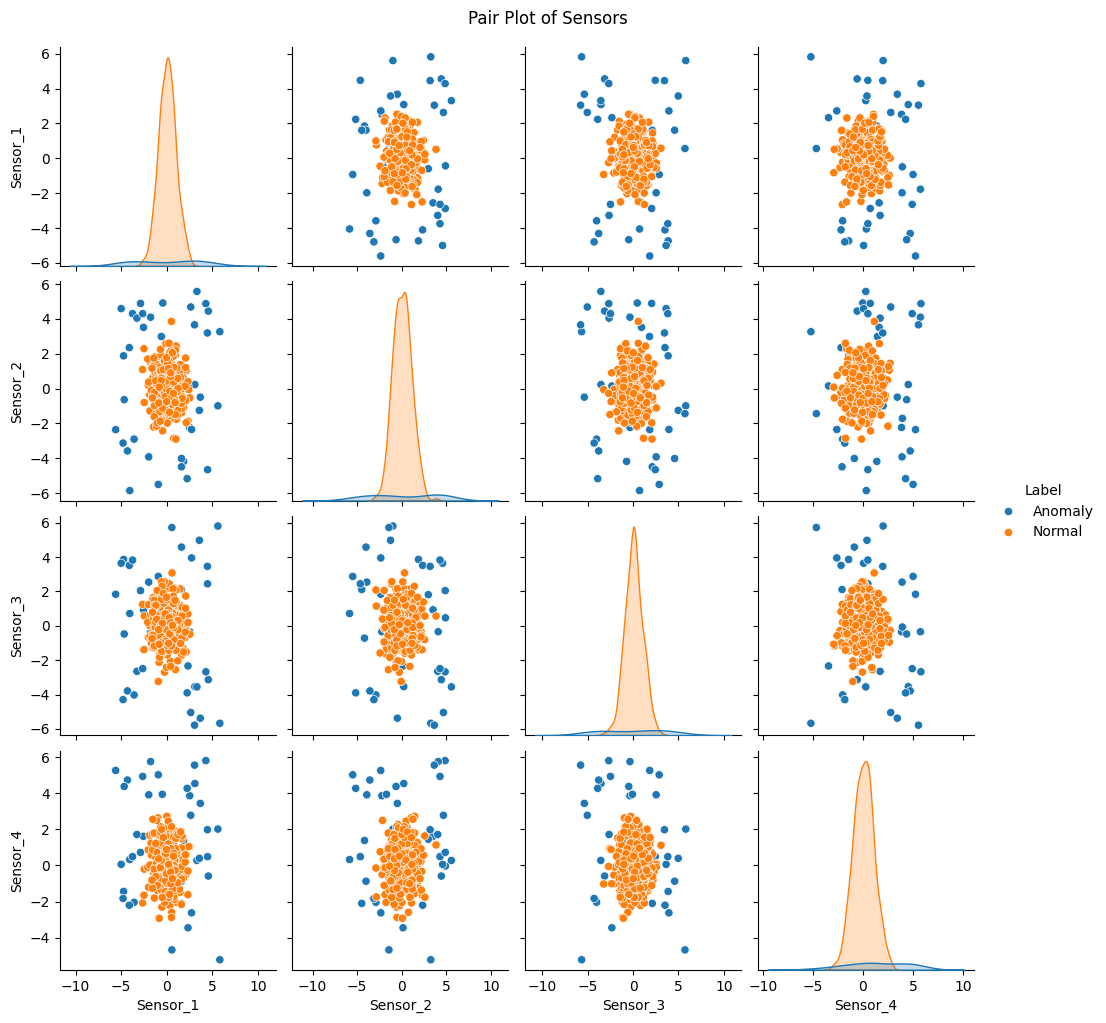

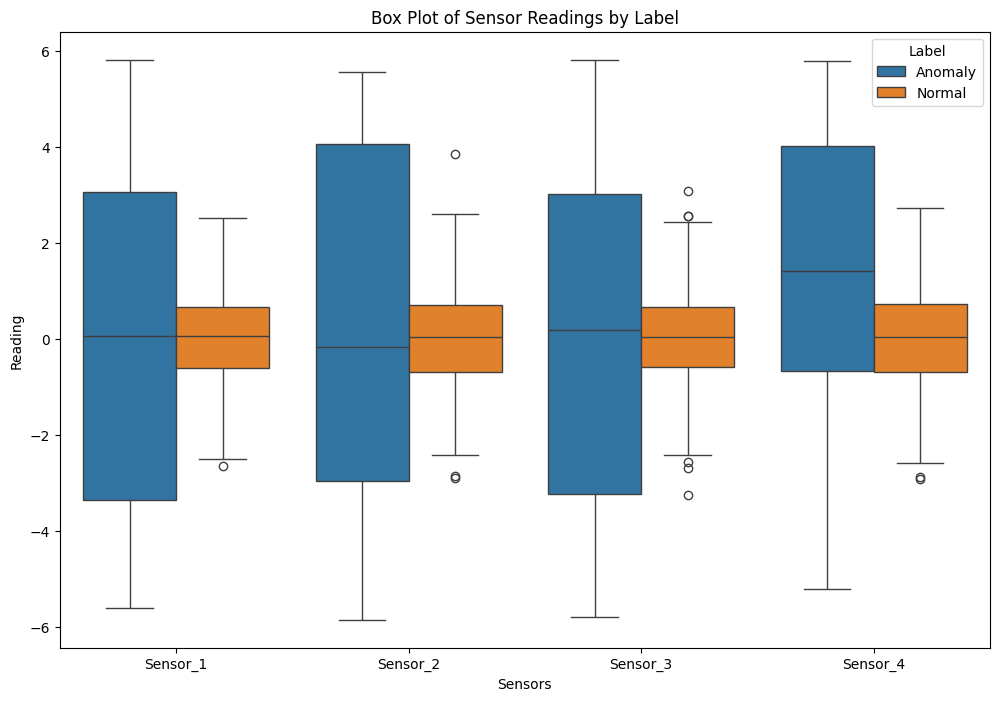

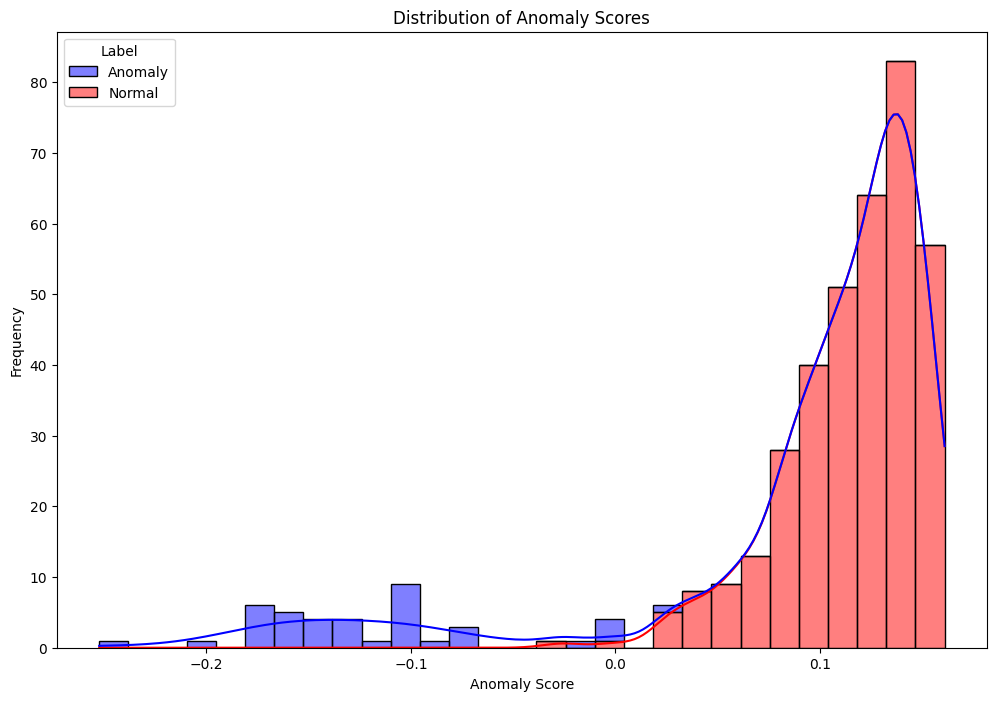

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
n_samples = 400
n_features = 4

# Simulating sensor data
data = np.random.randn(n_samples, n_features)
df = pd.DataFrame(data, columns=[f'Sensor_{i+1}' for i in range(n_features)])

# Adding some anomalies
n_anomalies = 40
anomalies = np.random.uniform(low=-6, high=6, size=(n_anomalies, n_features))
df.loc[:n_anomalies-1] = anomalies

# Add labels
df['Label'] = ['Anomaly' if i < n_anomalies else 'Normal' for i in range(n_samples)]

# Isolation Forest to compute anomaly scores
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the 'Label' column

model = IsolationForest(contamination=0.1, random_state=42)
df['AnomalyScore'] = model.fit_predict(df_scaled)
df['AnomalyScore'] = model.decision_function(df_scaled)  # Anomaly scores

# Mapping predictions to 'Anomaly' or 'Normal'
df['Anomaly'] = np.where(df['AnomalyScore'] < 0, 'Anomaly', 'Normal')

# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot
sns.pairplot(df, hue='Label', vars=[f'Sensor_{i+1}' for i in range(n_features)])
plt.suptitle('Pair Plot of Sensors', y=1.02)
plt.show()

# Box Plot for Sensor Readings
plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.melt(df, id_vars='Label', value_vars=[f'Sensor_{i+1}' for i in range(n_features)]),
            x='variable', y='value', hue='Label')
plt.title('Box Plot of Sensor Readings by Label')
plt.xlabel('Sensors')
plt.ylabel('Reading')
plt.show()

# Anomaly Scores Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df, x='AnomalyScore', hue='Label', multiple='stack', kde=True, palette=['blue', 'red'])
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


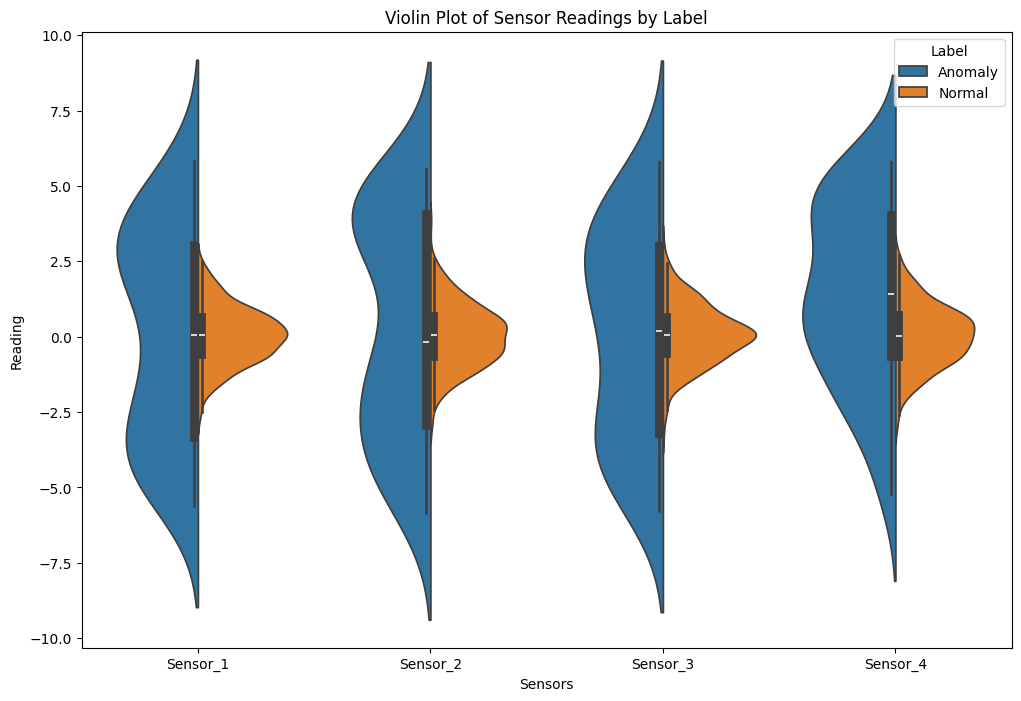

<ipython-input-43-6185f956f053>:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




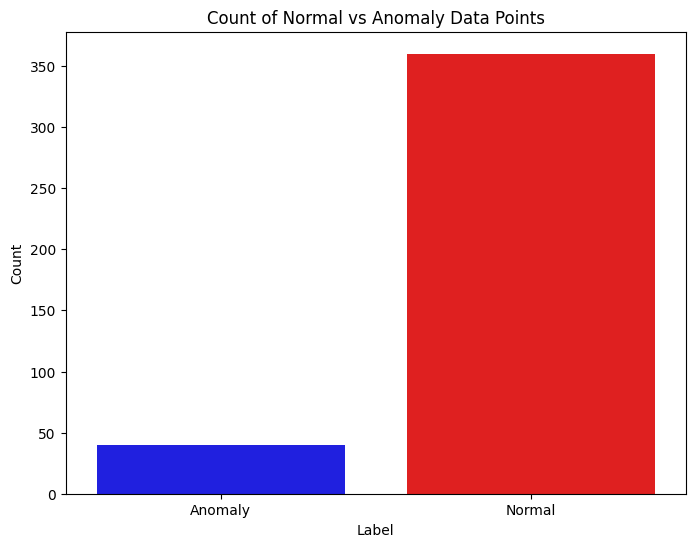

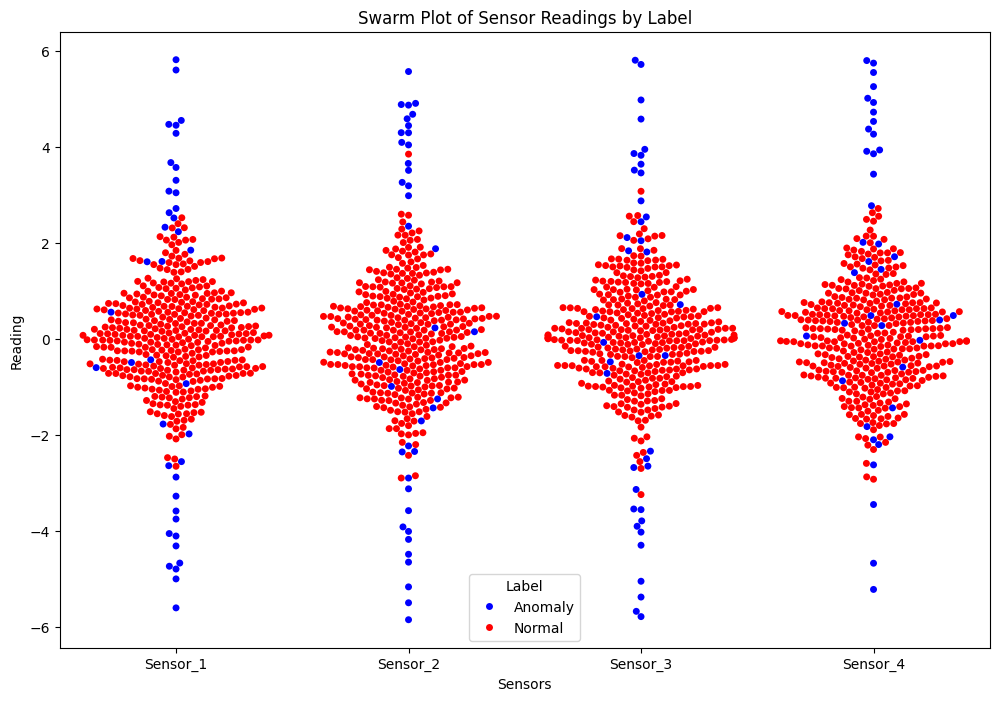

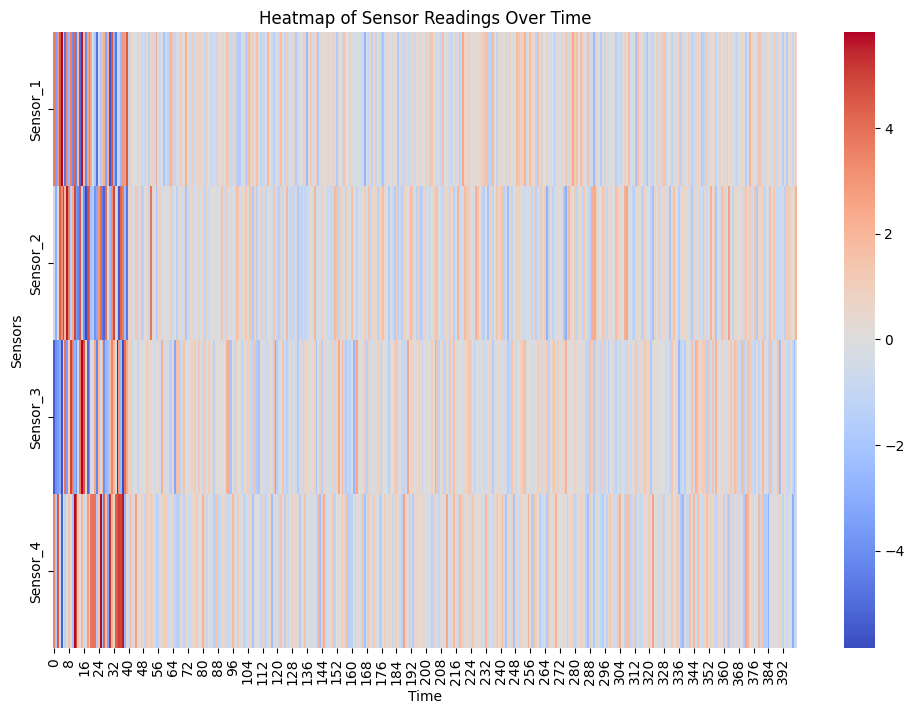

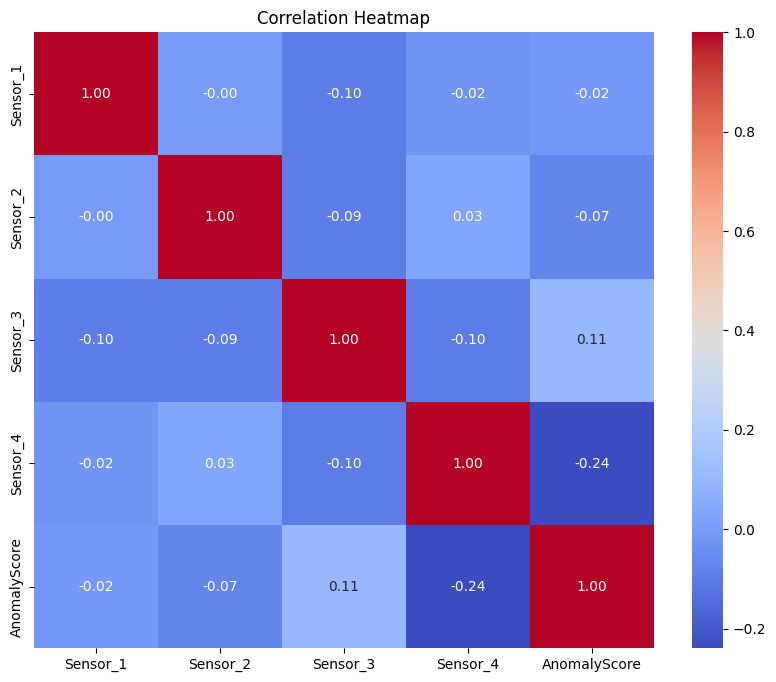

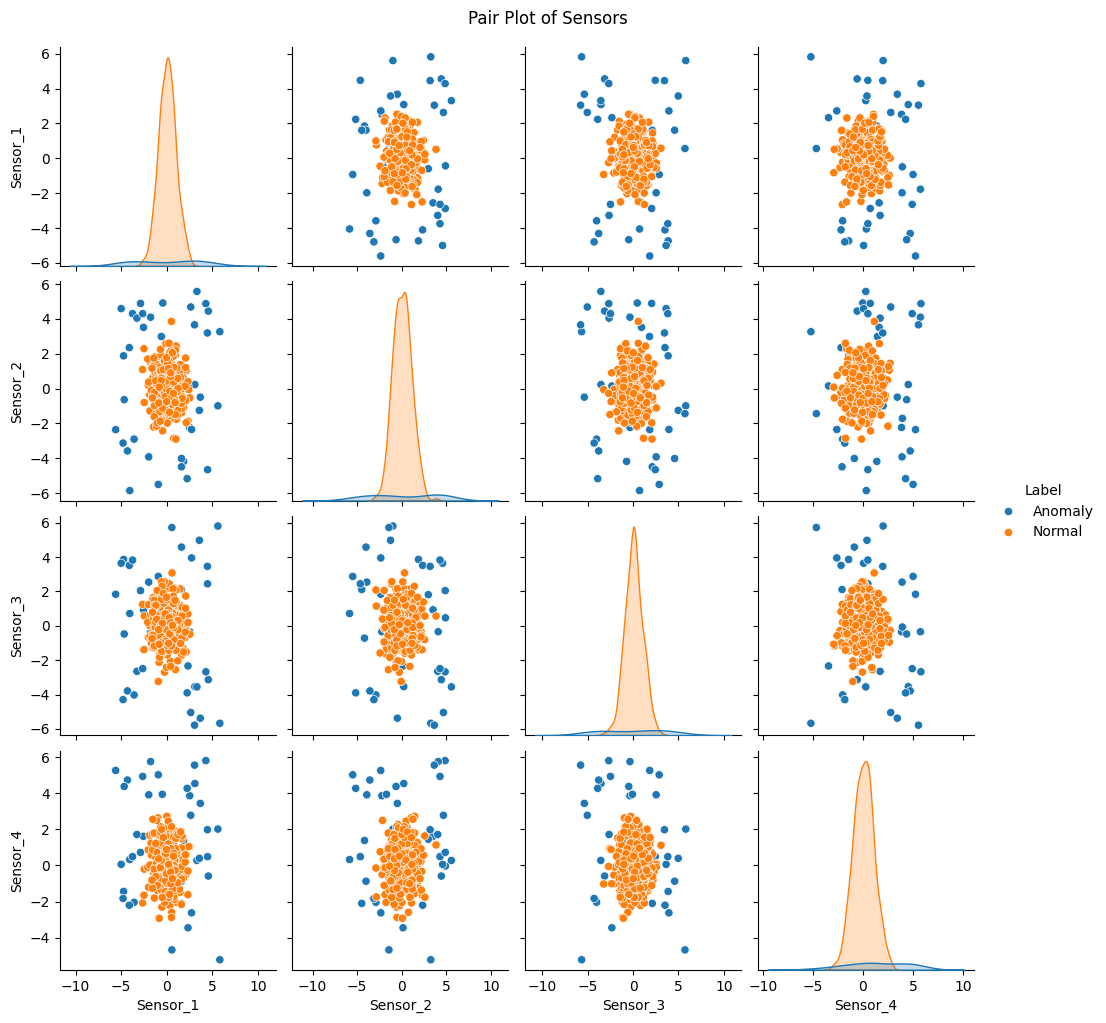

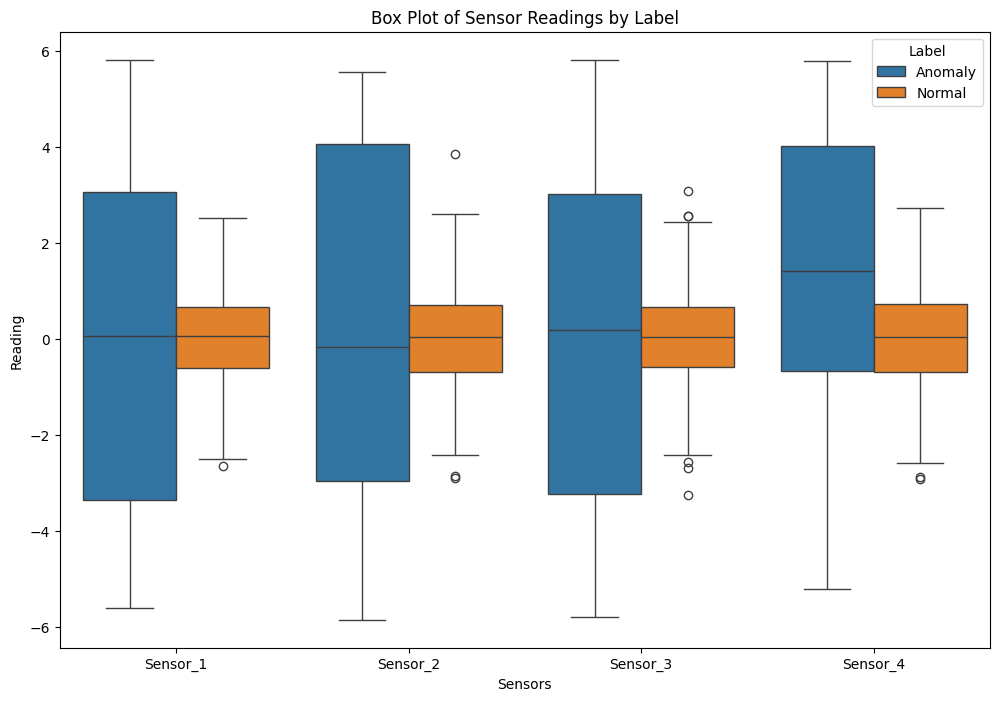

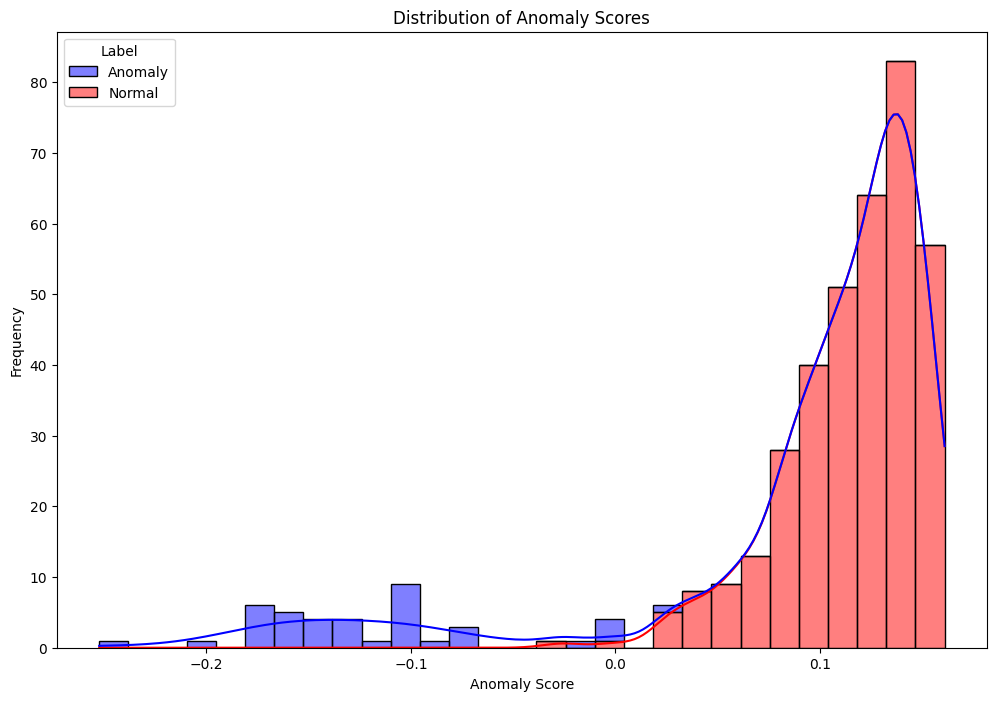

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as np
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
n_samples = 400
n_features = 4

# Simulating sensor data
data = np.random.randn(n_samples, n_features)
df = pd.DataFrame(data, columns=[f'Sensor_{i+1}' for i in range(n_features)])

# Adding some anomalies
n_anomalies = 40
anomalies = np.random.uniform(low=-6, high=6, size=(n_anomalies, n_features))
df.loc[:n_anomalies-1] = anomalies

# Add labels
df['Label'] = ['Anomaly' if i < n_anomalies else 'Normal' for i in range(n_samples)]

# Isolation Forest to compute anomaly scores
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the 'Label' column

model = IsolationForest(contamination=0.1, random_state=42)
df['AnomalyScore'] = model.fit_predict(df_scaled)
df['AnomalyScore'] = model.decision_function(df_scaled)  # Anomaly scores

# Mapping predictions to 'Anomaly' or 'Normal'
df['Anomaly'] = np.where(df['AnomalyScore'] < 0, 'Anomaly', 'Normal')

# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Violin Plot for Sensor Readings
plt.figure(figsize=(12, 8))
sns.violinplot(data=pd.melt(df, id_vars='Label', value_vars=[f'Sensor_{i+1}' for i in range(n_features)]),
               x='variable', y='value', hue='Label', split=True)
plt.title('Violin Plot of Sensor Readings by Label')
plt.xlabel('Sensors')
plt.ylabel('Reading')
plt.show()

# Count Plot for Labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label', palette=['blue', 'red'])
plt.title('Count of Normal vs Anomaly Data Points')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Swarm Plot for Sensor Readings
plt.figure(figsize=(12, 8))
sns.swarmplot(data=pd.melt(df, id_vars='Label', value_vars=[f'Sensor_{i+1}' for i in range(n_features)]),
              x='variable', y='value', hue='Label', palette=['blue', 'red'])
plt.title('Swarm Plot of Sensor Readings by Label')
plt.xlabel('Sensors')
plt.ylabel('Reading')
plt.show()

# Heatmap of Sensor Readings Over Time
plt.figure(figsize=(12, 8))
sns.heatmap(df[[f'Sensor_{i+1}' for i in range(n_features)]].T, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Sensors')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot
sns.pairplot(df, hue='Label', vars=[f'Sensor_{i+1}' for i in range(n_features)])
plt.suptitle('Pair Plot of Sensors', y=1.02)
plt.show()

# Box Plot for Sensor Readings
plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.melt(df, id_vars='Label', value_vars=[f'Sensor_{i+1}' for i in range(n_features)]),
            x='variable', y='value', hue='Label')
plt.title('Box Plot of Sensor Readings by Label')
plt.xlabel('Sensors')
plt.ylabel('Reading')
plt.show()

# Anomaly Scores Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df, x='AnomalyScore', hue='Label', multiple='stack', kde=True, palette=['blue', 'red'])
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


In [44]:
pip install dash plotly pandas scikit-learn

In [45]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
n_samples = 400
n_features = 4

# Simulating sensor data
data = np.random.randn(n_samples, n_features)
df = pd.DataFrame(data, columns=[f'Sensor_{i+1}' for i in range(n_features)])

# Adding some anomalies
n_anomalies = 40
anomalies = np.random.uniform(low=-6, high=6, size=(n_anomalies, n_features))
df.loc[:n_anomalies-1] = anomalies

# Add labels
df['Label'] = ['Anomaly' if i < n_anomalies else 'Normal' for i in range(n_samples)]

# Isolation Forest to compute anomaly scores
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the 'Label' column

model = IsolationForest(contamination=0.1, random_state=42)
df['AnomalyScore'] = model.fit_predict(df_scaled)
df['AnomalyScore'] = model.decision_function(df_scaled)  # Anomaly scores

# Mapping predictions to 'Anomaly' or 'Normal'
df['Anomaly'] = np.where(df['AnomalyScore'] < 0, 'Anomaly', 'Normal')

# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Sensor Data Analysis Dashboard"),

    dcc.Graph(id='correlation-heatmap'),
    dcc.Graph(id='pair-plot'),
    dcc.Graph(id='box-plot'),
    dcc.Graph(id='anomaly-scores-distribution'),
    dcc.Graph(id='violin-plot'),
    dcc.Graph(id='count-plot'),
    dcc.Graph(id='swarm-plot'),
    dcc.Graph(id='sensor-heatmap'),

    # Dummy interval to trigger the callback
    dcc.Interval(
        id='interval-component',
        interval=5*1000,  # 5 seconds interval
        n_intervals=0
    )
])

@app.callback(
    [Output('correlation-heatmap', 'figure'),
     Output('pair-plot', 'figure'),
     Output('box-plot', 'figure'),
     Output('anomaly-scores-distribution', 'figure'),
     Output('violin-plot', 'figure'),
     Output('count-plot', 'figure'),
     Output('swarm-plot', 'figure'),
     Output('sensor-heatmap', 'figure')],
    [Input('interval-component', 'n_intervals')]
)
def update_graphs(n):
    # Correlation Heatmap
    corr = numeric_df.corr()
    fig_corr = px.imshow(corr, text_auto=True, aspect="auto", title='Correlation Heatmap')

    # Pair Plot
    fig_pair = px.scatter_matrix(df, dimensions=[f'Sensor_{i+1}' for i in range(n_features)], color='Label', title='Pair Plot of Sensors')

    # Box Plot
    fig_box = px.box(pd.melt(df, id_vars='Label', value_vars=[f'Sensor_{i+1}' for i in range(n_features)]),
                     x='variable', y='value', color='Label', title='Box Plot of Sensor Readings by Label')

    # Anomaly Scores Distribution
    fig_anomaly_dist = px.histogram(df, x='AnomalyScore', color='Label', marginal='violin', nbins=50, title='Distribution of Anomaly Scores')

    # Violin Plot
    fig_violin = px.violin(pd.melt(df, id_vars='Label', value_vars=[f'Sensor_{i+1}' for i in range(n_features)]),
                           x='variable', y='value', color='Label', box=True, points='all', title='Violin Plot of Sensor Readings by Label')

    # Count Plot
    fig_count = px.histogram(df, x='Label', color='Label', title='Count of Normal vs Anomaly Data Points')

    # Swarm Plot
    fig_swarm = px.strip(pd.melt(df, id_vars='Label', value_vars=[f'Sensor_{i+1}' for i in range(n_features)]),
                         x='variable', y='value', color='Label', title='Swarm Plot of Sensor Readings by Label')

    # Heatmap of Sensor Readings
    fig_sensor_heatmap = px.imshow(df[[f'Sensor_{i+1}' for i in range(n_features)]].T, aspect="auto", title='Heatmap of Sensor Readings Over Time')

    return fig_corr, fig_pair, fig_box, fig_anomaly_dist, fig_violin, fig_count, fig_swarm, fig_sensor_heatmap

if __name__ == '__main__':
 app.run_server(debug=True, port=8007, use_reloader=False)



<IPython.core.display.Javascript object>